<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/mobileRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8e26eebd060dcf894c957997a765e72db462494af7567e586aa0b783c4713ba2
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


42.35154394299282
59.75167785234899
129.59594912886925
66.62573433023172


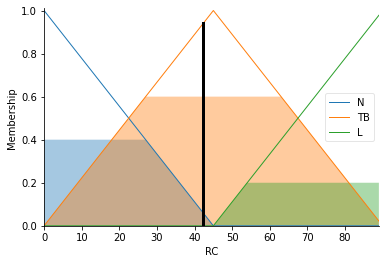

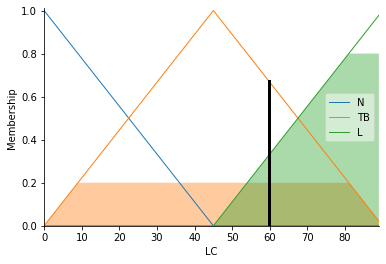

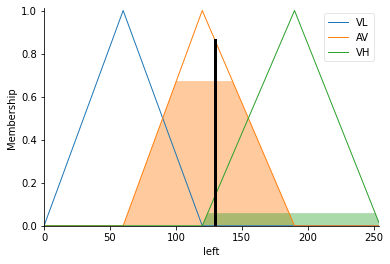

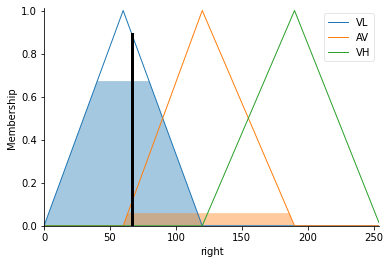

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crtl 

R = crtl.Antecedent(np.arange(0,1,0.1),'R')          # input1
C = crtl.Antecedent(np.arange(0,1,0.1),'C')            # input1
L = crtl.Antecedent(np.arange(0,1,0.1),'L')    # output1
LC = crtl.Consequent(np.arange(0,90,1),'LC')    # output1  
RC = crtl.Consequent(np.arange(0,90,1),'RC')    # output1      
left = crtl.Consequent(np.arange(0,255,1),'left')    # output1  
right = crtl.Consequent(np.arange(0,255,1),'right')
LCout = crtl.Antecedent(np.arange(0,90,1),'LCout')  
RCout = crtl.Antecedent(np.arange(0,90,1),'RCout')  

R['G'] = fuzz.trimf(R.universe,[0,0,0.5])
R['TB'] = fuzz.trimf(R.universe,[0,0.5,1])
R['X'] = fuzz.trimf(R.universe,[0.5,1,1])

C['G'] = fuzz.trimf(C.universe,[0,0,0.5])
C['TB'] = fuzz.trimf(C.universe,[0,0.5,1])
C['X'] = fuzz.trimf(C.universe,[0.5,1,1])

L['G'] = fuzz.trimf(L.universe,[0,0,0.5])
L['TB'] = fuzz.trimf(L.universe,[0,0.5,1])
L['X'] = fuzz.trimf(L.universe,[0.5,1,1])

RC['N'] = fuzz.trimf(RC.universe,[0,0,45])
RC['TB'] = fuzz.trimf(RC.universe,[0,45,90])
RC['L'] = fuzz.trimf(RC.universe,[45,90,90])

LC['N'] = fuzz.trimf(LC.universe,[0,0,45])
LC['TB'] = fuzz.trimf(LC.universe,[0,45,90])
LC['L'] = fuzz.trimf(LC.universe,[45,90,90])

RCout['N'] = fuzz.trimf(RCout.universe,[0,0,45])
RCout['TB'] = fuzz.trimf(RCout.universe,[0,45,90])
RCout['L'] = fuzz.trimf(RCout.universe,[45,90,90])

LCout['N'] = fuzz.trimf(LCout.universe,[0,0,45])
LCout['TB'] = fuzz.trimf(LCout.universe,[0,45,90])
LCout['L'] = fuzz.trimf(LCout.universe,[45,90,90])

left['VL'] = fuzz.trimf(left.universe,[0,60,120])
left['AV'] = fuzz.trimf(left.universe,[60,120,190])
left['VH'] = fuzz.trimf(left.universe,[120,190,255])

right['VL'] = fuzz.trimf(right.universe,[0,60,120])
right['AV'] = fuzz.trimf(right.universe,[60,120,190])
right['VH'] = fuzz.trimf(right.universe,[120,190,255])

RCrule1 = crtl.Rule(R['G']&C['G'],RC['L'])
RCrule2 = crtl.Rule(R['G']&C['TB'],RC['L'])
RCrule3 = crtl.Rule(R['G']&C['X'],RC['TB'])
RCrule4 = crtl.Rule(R['TB']&C['G'],RC['L'])
RCrule5 = crtl.Rule(R['TB']&C['TB'],RC['TB'])
RCrule6 = crtl.Rule(R['TB']&C['X'],RC['N'])
RCrule7 = crtl.Rule(R['X']&C['G'],RC['TB'])
RCrule8 = crtl.Rule(R['X']&C['TB'],RC['N'])
RCrule9 = crtl.Rule(R['X']&C['X'],RC['N'])

RC_ctrl = crtl.ControlSystem([RCrule1,RCrule2,RCrule3,RCrule4,RCrule5,RCrule6,RCrule7,RCrule8,RCrule9])
RCth = crtl.ControlSystemSimulation(RC_ctrl)
RCth.input['R'] = 0.4
RCth.input['C'] = 0.7
RCth.compute()
print(RCth.output['RC'])
RC.view(sim=RCth)


LCrule1 = crtl.Rule(L['G']&C['G'],LC['L'])
LCrule2 = crtl.Rule(L['G']&C['TB'],LC['L'])
LCrule3 = crtl.Rule(L['G']&C['X'],LC['TB'])
LCrule4 = crtl.Rule(L['TB']&C['G'],LC['L'])
LCrule5 = crtl.Rule(L['TB']&C['TB'],LC['TB'])
LCrule6 = crtl.Rule(L['TB']&C['X'],LC['N'])
LCrule7 = crtl.Rule(L['X']&C['G'],LC['TB'])
LCrule8 = crtl.Rule(L['X']&C['TB'],LC['N'])
LCrule9 = crtl.Rule(L['X']&C['X'],LC['N'])

LC_ctrl = crtl.ControlSystem([LCrule1,LCrule2,LCrule3,LCrule4,LCrule5,LCrule6,LCrule7,LCrule8,LCrule9])
LCth = crtl.ControlSystemSimulation(LC_ctrl)
LCth.input['L'] = 0.1
LCth.input['C'] = 0.1
LCth.compute()
print(LCth.output['LC'])
LC.view(sim=LCth)

Lrule1 = crtl.Rule(LCout['N']&RCout['N'],left['VH'])#,right['VH'])
Lrule2 = crtl.Rule(LCout['N']&RCout['TB'],left['AV'])#,right['VH'])
Lrule3 = crtl.Rule(LCout['N']&RCout['L'],left['VL'])#,right['AV'])
Lrule4 = crtl.Rule(LCout['TB']&RCout['N'],left['VH'])#,right['AV'])
Lrule5 = crtl.Rule(LCout['TB']&RCout['TB'],left['AV'])#,right['VL'])
Lrule6 = crtl.Rule(LCout['TB']&RCout['L'],left['VL'])#,right['AV'])
Lrule7 = crtl.Rule(LCout['L']&RCout['N'],left['AV'])#,right['VL'])
Lrule8 = crtl.Rule(LCout['L']&RCout['TB'],left['AV'])#,right['VL'])
Lrule9 = crtl.Rule(LCout['L']&RCout['L'],left['VL'])#,right['VH'])
LTH_ctrl = crtl.ControlSystem([Lrule1,Lrule2,Lrule3,Lrule4,Lrule5,Lrule6,Lrule7,Lrule8,Lrule9])

Rrule1 = crtl.Rule(LCout['N']&RCout['N'],right['VH'])
Rrule2 = crtl.Rule(LCout['N']&RCout['TB'],right['VH'])
Rrule3 = crtl.Rule(LCout['N']&RCout['L'],right['AV'])
Rrule4 = crtl.Rule(LCout['TB']&RCout['N'],right['AV'])
Rrule5 = crtl.Rule(LCout['TB']&RCout['TB'],right['VL'])
Rrule6 = crtl.Rule(LCout['TB']&RCout['L'],right['AV'])
Rrule7 = crtl.Rule(LCout['L']&RCout['N'],right['VL'])
Rrule8 = crtl.Rule(LCout['L']&RCout['TB'],right['VL'])
Rrule9 = crtl.Rule(LCout['L']&RCout['L'],right['VH'])
RTH_ctrl = crtl.ControlSystem([Rrule1,Rrule2,Rrule3,Rrule4,Rrule5,Rrule6,Rrule7,Rrule8,Rrule9])


LTH = crtl.ControlSystemSimulation(LTH_ctrl)
LTH.input['LCout'] = LCth.output['LC']
LTH.input['RCout'] = RCth.output['RC']
LTH.compute()
print(LTH.output['left'])
left.view(sim=LTH)

RTH = crtl.ControlSystemSimulation(RTH_ctrl)
RTH.input['LCout'] = LCth.output['LC']
RTH.input['RCout'] = RCth.output['RC']
RTH.compute()
print(RTH.output['right'])
right.view(sim=RTH)